In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
import pandas as pd
from time import time
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [70]:
iris = pd.read_csv('iris.csv')

In [71]:
X_data = iris.iloc[:,2:4].values
Y = iris.iloc[:,4].values
print(Y.shape)

(150,)


In [72]:
X0 = np.ones((150,1))
X = np.append(X_data, X0, axis=1)

In [73]:
a = np.array(X[0:40,:])
b = np.array(X[50:90,:])
c = np.array(X[100:140,:])
array_tuple = (a, b, c)
X_training = np.vstack(array_tuple)

a2 = np.array(Y[0:40])
b2 = np.array(Y[50:90])
c2 = np.array(Y[100:140])
array_tuple2 = (a2, b2, c2)
Y_training = np.vstack(array_tuple2)

d = np.array(X[40:50,:])
e = np.array(X[90:100,:])
f = np.array(X[140:150,:])
array_tuple5 = (d, e, f)
X_test = np.vstack(array_tuple5)

d2 = np.array(Y[40:50])
e2 = np.array(Y[90:100])
f2 = np.array(Y[140:150])
array_tuple6 = (d2, e2, f2)
Y_test = np.vstack(array_tuple6)

In [74]:
t1 = np.append(np.ones((40,1)),np.zeros((80,1)))
t21 = np.append(np.zeros((40,1)),np.ones((40,1)))
t2 = np.append(t21,np.zeros((40,1)))
t3 = np.append(np.zeros((80,1)),np.ones((40,1)))
print (t1.shape)

(120,)


In [75]:
T_0 = (t1,t2,t3)
T = np.column_stack((T_0))
print(T.shape)

(120, 3)


In [76]:
W1 = np.zeros((2,1))
W2 = np.zeros((2,1))
W3 = np.zeros((2,1))
b = np.zeros((1,3))
print(b)

[[0. 0. 0.]]


In [77]:
Wt = np.column_stack(((W1,W2,W3)))
print(Wt)
print(X_training.shape)
print(W.shape)
print(W)

[[0. 0. 0.]
 [0. 0. 0.]]
(120, 3)
(3, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [78]:
W = np.row_stack((Wt,b))
alphaMax = 300

In [79]:
#here is the class of MNR
class MultinumialRegression:
    
    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
    
    def fit_model(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_b, y_b = X[idx], y[idx]
            error = y_b - self.predict_(X_b)
            update = (lr * np.dot(error.T, X_b))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_values = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_values)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

0.98


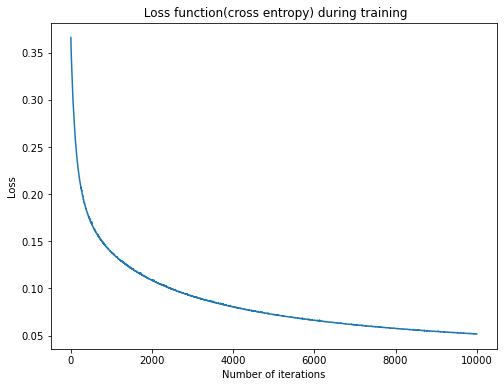

In [80]:
#load the dataset
X,y = datasets.load_iris(return_X_y=True)
MNR = MultinumialRegression(thres=1e-5)
MNR.fit_model(X,y,lr=0.0001)
print(MNR.score(X, y))
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(MNR.loss)),MNR.loss)
plt.title(" Loss function(cross entropy) during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

/var/folders/lv/hshn6m_945bcxmmv_x23mrf40000gn/T/ipykernel_42199/2012698747.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


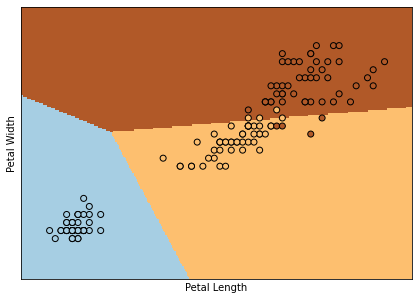

0.94

In [90]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # I only take petal features
Y = iris.target

MNR = MultiClassLogisticRegression()

# fit the data and Create an instance of MNR
MNR.fit(X, Y)
# Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
Mu = .02  # step size 
xx, yy = np.meshgrid(np.arange(x_min, x_max, Mu), np.arange(y_min, y_max, Mu))
Z = MNR.predict_classes(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()
MNR.score(X, Y)


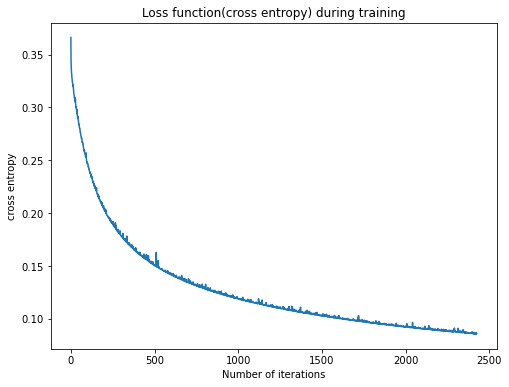

0.94

In [82]:
fig = plt.figure(figsize=(8,6))
plt.plot( np.arange(len(MNR.loss)),MNR.loss)
plt.title("Loss function(cross entropy) during training")
plt.xlabel("Number of iterations")
plt.ylabel("cross entropy")
plt.show()
MNR.score(X, Y)

#In code below we have some parameters:

Lambda is our learning rate between 0.0 and 1.0

epochs (default: 50) Passes over the training dataset.

l2 Regularization parameter for L2 regularization. No regularization if l2=0.0.

random_seed(default: None) Set random state for shuffling and initializing the weights.

function on_hot is return a matrix which each sample in y is represented as a row and each colums represent the class label.

In [83]:
class SoftmaxRegression(object):

    def __init__(self, Lambda=0.01, epochs=50,
                 l2=0.0,
                 minibatches=1,
                 n_classes=None,
                 random_seed=None):

        self.Lambda = Lambda
        self.epochs = epochs
        self.l2 = l2
        self.minibatches = minibatches
        self.n_classes = n_classes
        self.random_seed = random_seed

    def _fit(self, X, y, init_params=True):
        if init_params:
            if self.n_classes is None:
                self.n_classes = np.max(y) + 1
            self._n_features = X.shape[1]

            self.b_, self.w_ = self._init_params(
                weights_shape=(self._n_features, self.n_classes),
                bias_shape=(self.n_classes,),
                random_seed=self.random_seed)
            self.ACE_ = []

        y_enc = self._one_hot(y=y, n_labels=self.n_classes, dtype=np.float)
        for i in range(self.epochs):
            for idx in self._yield_minibatches_idx(
                    n_batches=self.minibatches,
                    data_ary=y,
                    shuffle=True):
                net = self._net_input(X[idx], self.w_, self.b_)
                softm = self._softmax(net)
                diff = softm - y_enc[idx]
                mse = np.mean(diff, axis=0)

                
                grad = np.dot(X[idx].T, diff)
                
                self.w_ -= (self.Lambda * grad +
                            self.Lambda * self.l2 * self.w_)
                self.b_ -= (self.Lambda * np.sum(diff, axis=0))
                
            #compute ACE of all the iterations
            net = self._net_input(X, self.w_, self.b_)
            softm = self._softmax(net)
            cross_ent = self._cross_entropy(output=softm, y_target=y_enc)
            ACE = self._ACE(cross_ent)
            self.ACE_.append(ACE)
        return self
#Learn model from training data
    def fit(self, X, y, init_params=True):
        if self.random_seed is not None:
            np.random.seed(self.random_seed)
        self._fit(X=X, y=y, init_params=init_params)
        self._is_fitted = True
        return self
    
    def _predict(self, X):
        probas = self.predict_probability(X)
        return self._to_classlabels(probas)
 
    def predict(self, X):

        if not self._is_fitted:
            raise AttributeError('Model is not fitted, yet.')
        return self._predict(X)

    def predict_probability(self, X):
     
        net = self._net_input(X, self.w_, self.b_)
        softm = self._softmax(net)
        return softm

    def _net_input(self, X, W, b):
        return (X.dot(W) + b)

    def _softmax(self, z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    def _cross_entropy(self, output, y_target):
        return - np.sum(np.log(output) * (y_target), axis=1)

    def _ACE(self, cross_entropy):
        L2_term = self.l2 * np.sum(self.w_ ** 2)
        cross_entropy = cross_entropy + L2_term
        return 0.5 * np.mean(cross_entropy)

    def _to_classlabels(self, z):
        return z.argmax(axis=1)
    
    def _init_params(self, weights_shape, bias_shape=(1,), dtype='float64',
                     scale=0.01, random_seed=None):
      
        if random_seed:
            np.random.seed(random_seed)
        w = np.random.normal(loc=0.0, scale=scale, size=weights_shape)
        b = np.zeros(shape=bias_shape)
        return b.astype(dtype), w.astype(dtype)

    def _one_hot(self, y, n_labels, dtype):
   
        mat = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            mat[i, val] = 1
        return mat.astype(dtype)    
    
    def _yield_minibatches_idx(self, n_batches, data_ary, shuffle=True):
            indices = np.arange(data_ary.shape[0])

            if shuffle:
                indices = np.random.permutation(indices)
            if n_batches > 1:
                remainder = data_ary.shape[0] % n_batches

                if remainder:
                    minis = np.array_split(indices[:-remainder], n_batches)
                    minis[-1] = np.concatenate((minis[-1],
                                                indices[-remainder:]),
                                               axis=0)
                else:
                    minis = np.array_split(indices, n_batches)

            else:
                minis = (indices,)

            for idx_batch in minis:
                yield idx_batch
    
    def _shuffle_arrays(self, arrays):
        r = np.random.permutation(len(arrays[0]))
        return [ary[r] for ary in arrays]

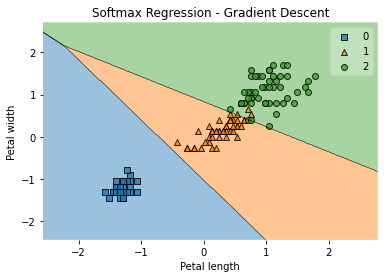

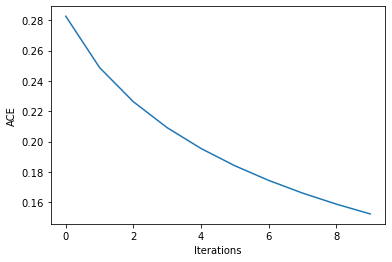

In [84]:
X, y = iris_data()
#Petal length and petal width
X = X[:, 2 : ] 
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
MNR2 = SoftmaxRegression(Lambda=0.01, epochs=10, minibatches=1, random_seed=0)
MNR2.fit(X, y)

plot_decision_regions(X, y, clf=MNR2)
plt.title('Softmax Regression - Gradient Descent')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

plt.plot(range(len(MNR2.ACE_)), MNR2.ACE_)
plt.xlabel('Iterations')
plt.ylabel('ACE')
plt.show()

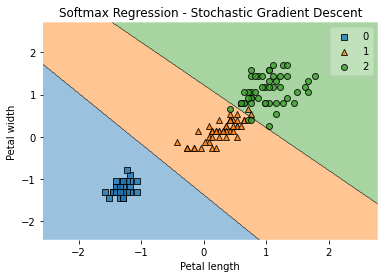

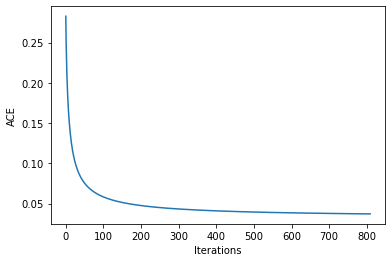

In [85]:
#Continue training for another 800 epochs by calling the fit method with init_params=False
MNR2.epochs = 800
MNR2.fit(X, y, init_params=False)
plot_decision_regions(X, y, clf=MNR2)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

plt.plot(range(len(MNR2.ACE_)), MNR2.ACE_)
plt.xlabel('Iterations')
plt.ylabel('ACE')
plt.show()

In [89]:
#predicted class label and probability
y_pred = MNR2.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])
y_pred = MNR2.predict_probability(X)
print(y_pred[-3:])

Last 3 Class Labels: [2 2 2]
[[4.81830603e-09 1.22636163e-02 9.87736379e-01]
 [1.60718486e-11 4.06274528e-04 9.99593725e-01]
 [1.58538721e-07 9.63790694e-02 9.03620772e-01]]
